# EPE Detection

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data processing&displaying

In [17]:
df = pd.read_csv('materials/processed_df.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             401 non-null    object 
 1   wiek                           401 non-null    float64
 2   PSA                            397 non-null    float64
 3   PSAdensity                     401 non-null    float64
 4   MRI vol                        401 non-null    float64
 5   MRI Pirads                     399 non-null    float64
 6   MRI EPE (naciek poza torebke)  401 non-null    float64
 7   MRI EPE L                      401 non-null    float64
 8   MRI EPE P                      401 non-null    float64
 9   MRI SVI (pecherzyki)           401 non-null    float64
 10  MRI SVI L                      400 non-null    float64
 11  MRI SVI P                      401 non-null    float64
 12  MRI SIZE                       371 non-null    flo

In [18]:
df.shape

(401, 31)

In [19]:
target = 'EPE RP'
col_wiek = 'wiek'
col_psa = 'PSA'
col_mri_vol = 'MRI vol'
col_biop_grade = 'Bx ISUP Grade'
col_pirads = 'MRI Pirads'
col_mri_esur = 'MRI EPE (naciek poza torebke)'
col_mri_svi = 'MRI SVI (pecherzyki)'
col_mri_size = 'MRI SIZE'

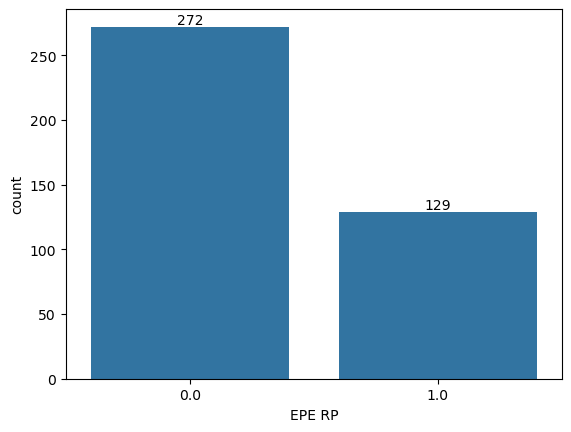

In [20]:
patients = len(df)
epe_dist = df[target].value_counts()

ax = sns.countplot(data=df, x=target)

for container in ax.containers:
    ax.bar_label(container)

plt.show(ax)

In [21]:
all_cols = [target, col_wiek, col_psa, col_mri_vol, col_biop_grade, col_pirads, col_mri_esur, col_mri_size, col_mri_svi]
continuous = [col_wiek, col_psa, col_mri_vol, col_mri_size]
categorical = [col_biop_grade, col_pirads, col_mri_esur, col_mri_svi]


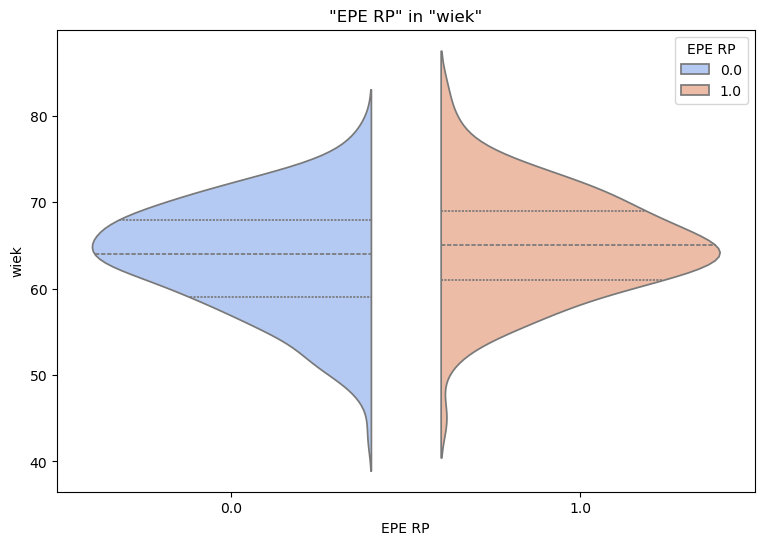

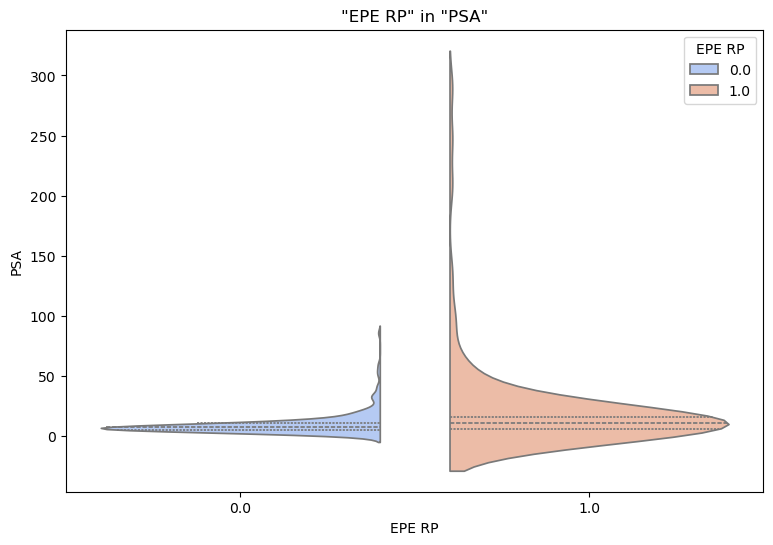

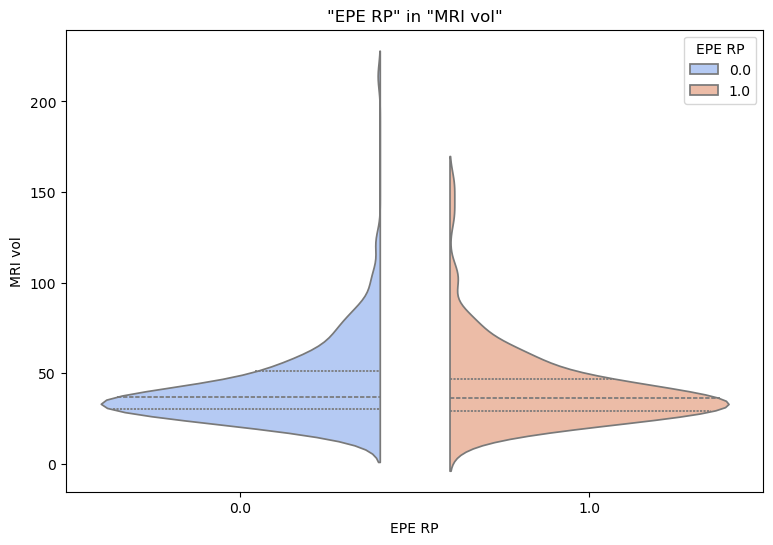

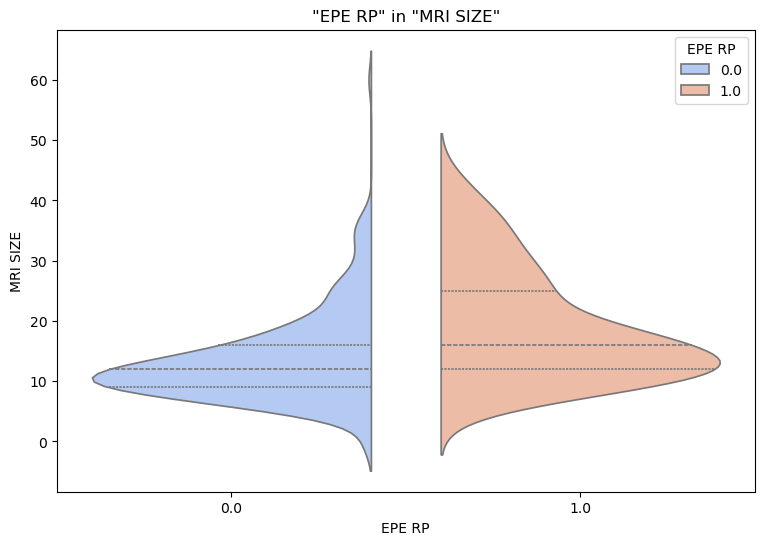

In [22]:
for col in continuous:
        plt.figure(figsize=(9, 6))
        sns.violinplot(x=target, y=col, hue=target, data=df, palette='coolwarm', split=True, inner='quartile')
        plt.title(f'"{target}" in "{col}"')
        plt.show()

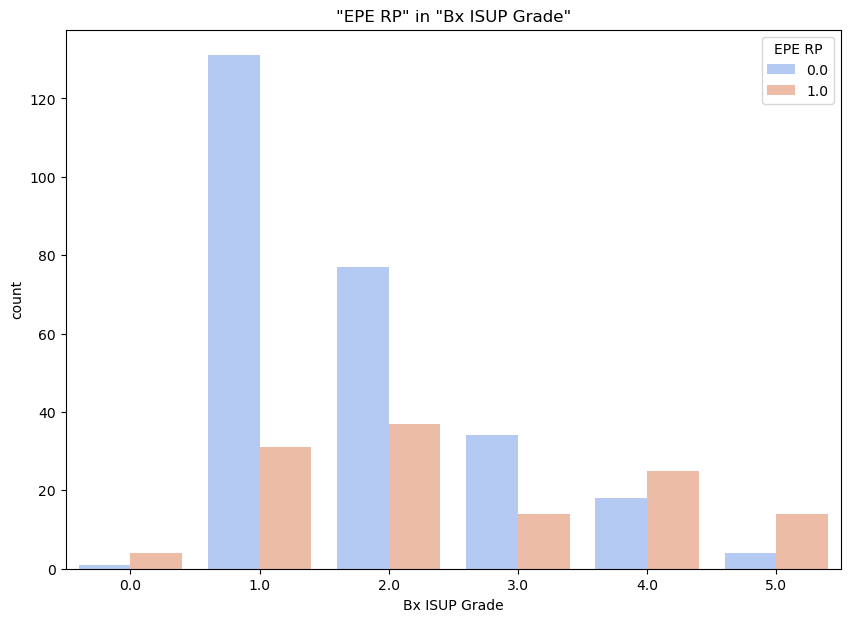

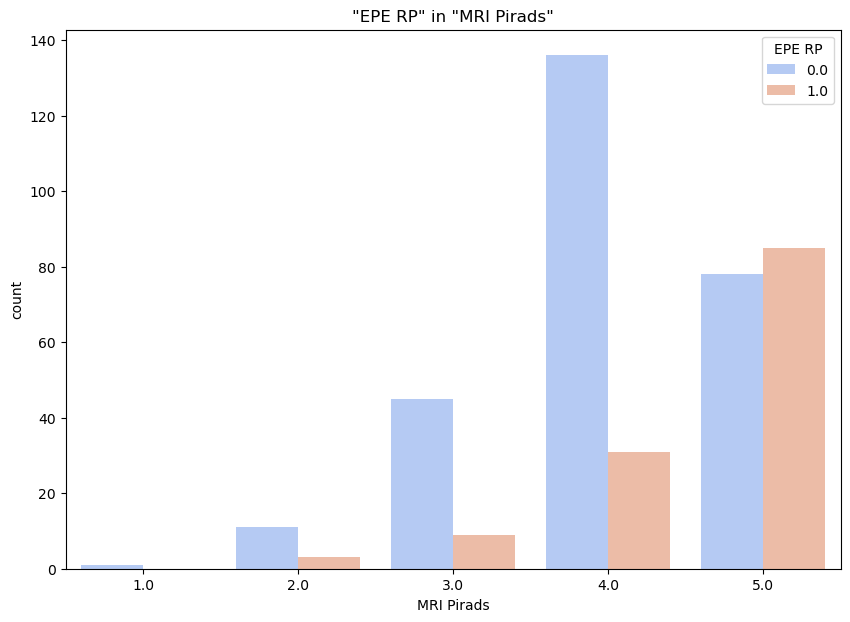

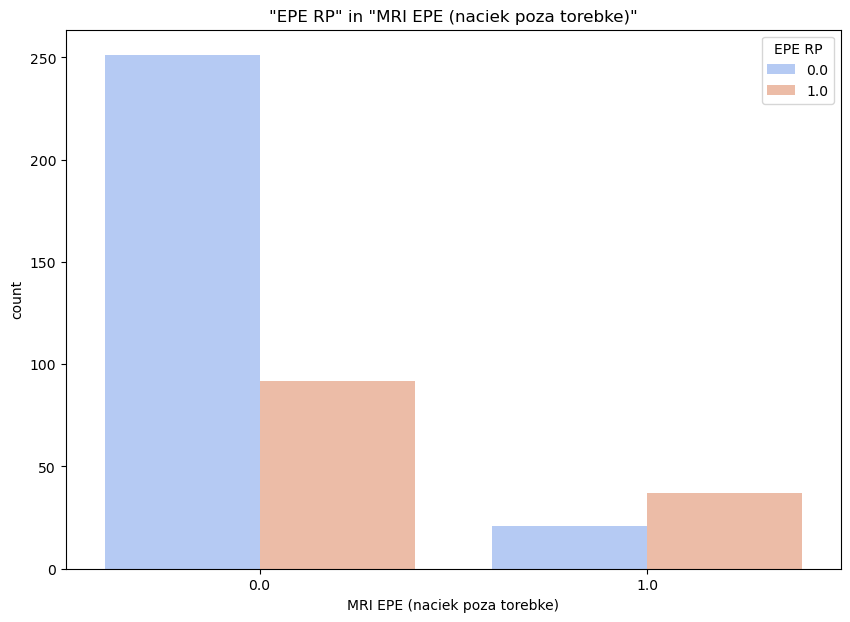

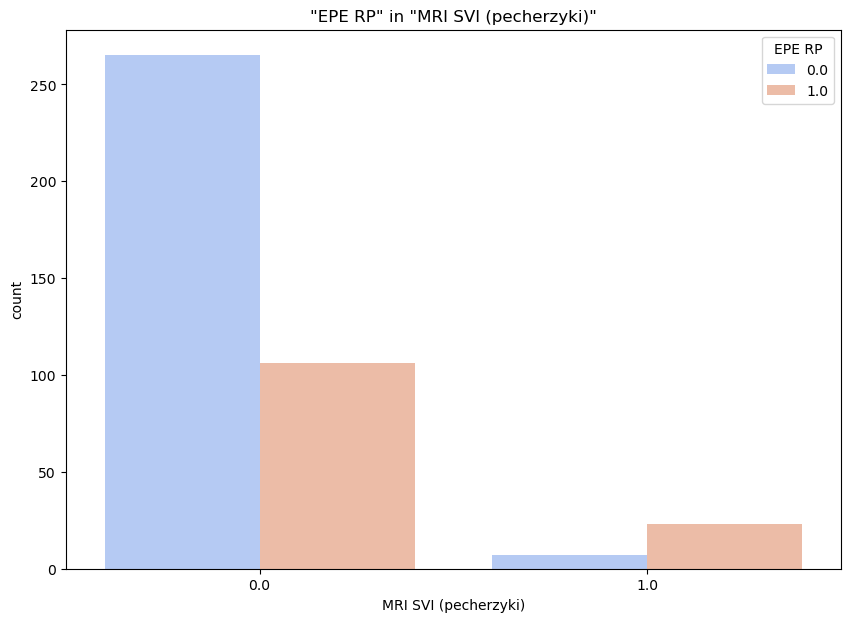

In [23]:
for col in categorical:
        plt.figure(figsize=(10, 7))
        
        sns.countplot(x=col, hue=target, data=df, palette='coolwarm')
        
        plt.title(f'"{target}" in "{col}"')
        
       
        plt.show()

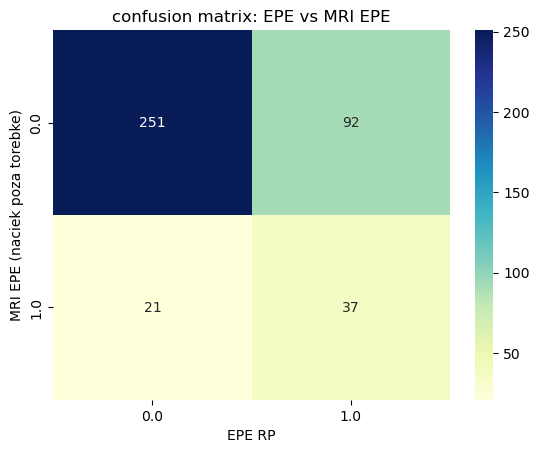

In [24]:
crosstab_data = pd.crosstab(
    df[col_mri_esur],
    df[target]
)

sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='YlGnBu')

plt.title(f'confusion matrix: EPE vs MRI EPE')

plt.show()

Sensitivity = 28.68% (mri where existent epe)
Specificity = 92.28% (mri results where non existent epe)
Accuracy = 71.82%

# Modeling 

In [29]:
from unified_functions import get_model_pipeline, train_and_evaluate_model, plot_roc, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [30]:
before_biopsy_all = [target, col_wiek, col_psa, col_mri_vol, col_pirads, col_mri_esur, col_mri_size, col_mri_svi]
continueous = [col_wiek, col_psa, col_mri_vol, col_mri_size]
categorical = [col_pirads, col_mri_esur, col_mri_svi]


In [31]:
model_df = df[df['EPE RP'].isnull()==False]

X = model_df[before_biopsy_all]
y = model_df['EPE RP']

model = RandomForestClassifier(random_state=2)

In [32]:
y_true, y_pred, y_pred_probs, fpr, tpr, roc_auc, model_pipeline, best_params = train_and_evaluate_model(
    model=model,
    X=X,
    y=y,
    numerical_cols=continueous,
    categorical_cols=categorical,
    n_folds=5,
    tune_params=False  # Ustaw na True jeśli chcesz strojenie hiperparametrów
)

Training model with default hyperparameters...

Fold 0:
ROC AUC score: 0.7188811188811188

Fold 1:
ROC AUC score: 0.6821818181818182

Fold 2:
ROC AUC score: 0.6691595441595442

Fold 3:
ROC AUC score: 0.7275641025641025

Fold 4:
ROC AUC score: 0.733974358974359

Total scores:
ROC AUC score: 0.7046853625170998



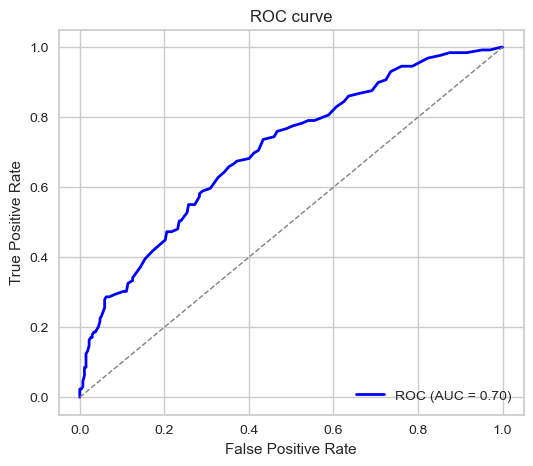

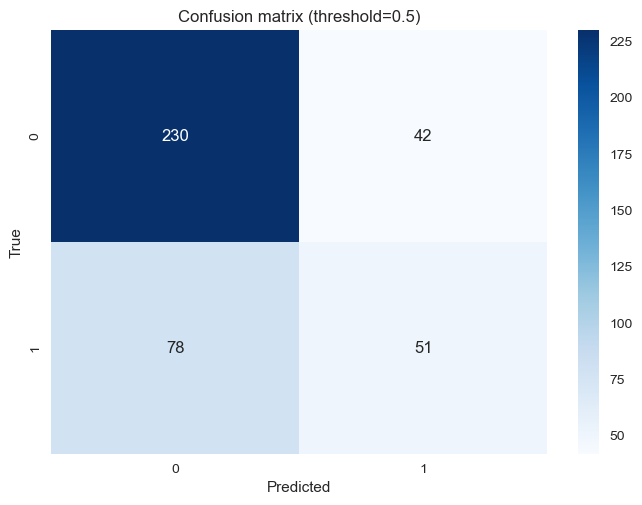

In [33]:
plot_roc(fpr, tpr, roc_auc)
plot_confusion_matrix(y_true, y_pred_probs=y_pred_probs, threshold=0.5)